<a href="https://colab.research.google.com/github/emmendorfer/test/blob/main/Ondas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Este Notebook ilustra o uso da tranformada rápida de Fourier para o estudo de imagens de ondas reais, do oceano. É detectada, automaticamente, por meio da transformda, a orientação e o comprimento de onda. Créditos: Leonardo Emmendörfer (UFSM) e Tatiana Schein (PPGMC/FURG).

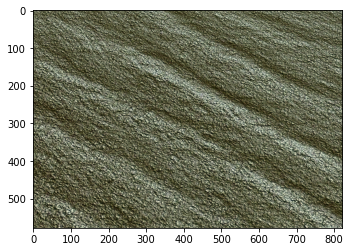

In [4]:
import cv2
import numpy as np
from skimage.io import imsave
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf
from PIL import Image
import statsmodels as sm
import pandas as pd
import seaborn as sns
from sys import argv
from math import pi, sin
from scipy import fftpack
from PIL import Image 
from PIL.Image import NEAREST
from PIL.Image import BICUBIC

black_color = (0,0,0)
white_color= (255,255,255)


nome='70'


img_orig =cv2.imread(nome+'.png') 
plt.imshow(img_orig)     


Na imagem acima, a imagem original mostra ondas paralelas no oceano, com orientação aproximadamente diagonal e comprimento de onda aproximadamente constante.

In [ ]:
m_red=np.zeros(img_orig.shape)
m_green=np.zeros(img_orig.shape)
m_blue=np.zeros(img_orig.shape)

m_blue[:,:,0]=img_orig[:,:,0] # 0
m_blue[:,:,1]=img_orig[:,:,0] #0
m_blue[:,:,2]=img_orig[:,:,0] # 0
  
cv2.imwrite(nome+"_Fchannel.png",m_blue)
img0 = Image.open(nome+"_Fchannel.png")


angval=[]
periodos=[]
maxamplitudes=[]

In [ ]:

for angi in range(160):  


    ang=angi -80
    #ang=0
    angval.append(ang)
 
 
    cols, lins = img0.size
    dim=min(lins,cols)
    c1=round(lins/2)
    c2=round(cols/2)
    rotate_img= img0.rotate(ang, BICUBIC, 0,None,None, black_color)
    #rotate_img= img.rotate(-10)
     
    rotate_img.save("Fr.png", "png")
    
    imgr =cv2.imread("Fr.png") 
    t0=len(imgr)
    t1=len(imgr[0])
    imgr=imgr[round(t0/10):9*round(t0/10),round(t1/10):9*round(t1/10)]
    
    (lins,cols,chans)=imgr.shape
    vec=np.zeros((lins))
    ccols=0
    for i in range(cols): #for é um contador, range é usado p mostrar o que deve ser contado
        if imgr[0,i,0]>0 and imgr[0,i,1]>0 and imgr[0,i,2]>0 and imgr[lins-1,i,0]>0 and imgr[lins-1,i,1]>0 and imgr[lins-1,i,2]>0:
            vec=vec+imgr[:,i, 1]   # 0 é só azul!! 1 é verde
            ccols=ccols+1
    vec=vec/ccols  
    
    s = vec #colocar [:,:,0] p ser bidimensional e [0,:,0] para ser unidimensional #np.sin(40 * 2 * np.pi * t) + 0.5 * np.sin(90 * 2 * np.pi * t)
    fs = 1.0
    t = np.linspace(0,len(s)-1,len(s))

    
    # Compute the one-dimensional discrete Fourier Transform.
    fft_wave = np.fft.fft(s)
    # Compute the Discrete Fourier Transform sample frequencies.
    fft_fre = np.fft.fftfreq(n=s.size, d=1/fs) 
   
    frequencias = fft_fre #Retorne as frequências de amostra da Transformada Discreta de Fourier.     
    amplitudes = np.abs(fft_wave)
    
    fpos=frequencias[frequencias>0] #mascara para só pegar valores positivos
    apos=amplitudes[frequencias>0]
        
    idx=np.argmax(apos) #Retorna os índices dos valores máximos ao longo de um eixo.
    
    periodos.append(1/fpos[idx])
    maxval=max(vec)
    maxamplitudes.append(maxval)
isol=np.argmax(maxamplitudes)      
bestp=periodos[isol]
bestang=angval[isol]

A variável "bestang" armazena a orientação das ondas, que foi detectada após busca exaustiva discreta relizada com o comando "for" acima. Para encontrar este valor, a imagem original é rotacionada diversas vezes.
 


In [ ]:
bestang

26

Aplicando o ângulo de rotação ótimo obtido anteriormente, a imagem resultante fica da seguinte forma: 


In [ ]:

ang=bestang
cols, lins = img0.size
dim=min(lins,cols)
c1=round(lins/2)
c2=round(cols/2)
rotate_img= img0.rotate(ang, BICUBIC, 0,None,None, black_color)


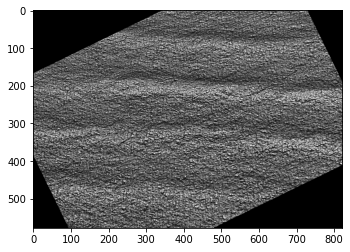

In [ ]:
plt.imshow(rotate_img)

Note que, na imagem rotacionada, as ondas estão alinhadas na horizontal.


In [ ]:

rotate_img.save(nome+"_Fr.png", "png")
imgr =cv2.imread(nome+"_Fr.png") 
t0=len(imgr)
t1=len(imgr[0])
imgr=imgr[round(t0/10):9*round(t0/10),round(t1/10):9*round(t1/10)]

Projetamos agora a da imagem rotacionada no eixo vertical (y), resultando em um vetor unidimensional chamado de "vec":

In [ ]:

(lins,cols,chans)=imgr.shape
vec=np.zeros((lins))
ccols=0
for i in range(cols): 
    if imgr[0,i,0]>0 and imgr[0,i,1]>0 and imgr[0,i,2]>0 and imgr[lins-1,i,0]>0 and imgr[lins-1,i,1]>0 and imgr[lins-1,i,2]>0:
        vec=vec+imgr[:,i, 1]   # 0 é só azul!! 1 é verde
        ccols=ccols+1
vec=vec/ccols  

Os valores do vetor "vec" estão ilustrados a seguir em azul. Note que as oscilações nos valores são resultado das variações da imagem de onda original. 

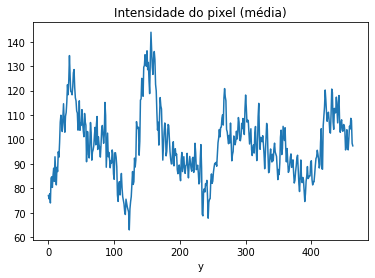

In [ ]:
plt.plot(vec)
plt.xlabel("y")
plt.title('Intensidade do pixel (média)')
plt.show()

A seguir, é calculada a transformada discreta de Fourier do sinal obtido:


In [ ]:
s = vec 
fs = 1.0
t = np.linspace(0,len(s)-1,len(s))
fft_wave = np.fft.fft(s)
fft_fre = np.fft.fftfreq(n=s.size, d=1/fs) 
frequencias = fft_fre  
amplitudes = np.abs(fft_wave)

In [ ]:

fpos=frequencias[frequencias>0] #mascara para só utilizar valores positivos
apos=amplitudes[frequencias>0]


Os valores obtidos para as amplitudes, para cada valor de frequência, são mostrados a seguir: 

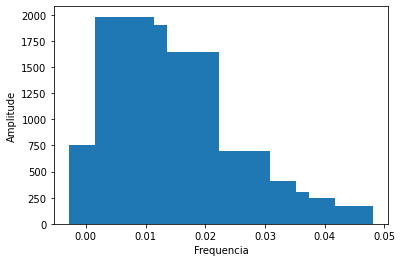

In [ ]:

plt.ylabel("Amplitude")
plt.xlabel("Frequencia")
plt.bar(fpos[:20],apos[:20], width=0.01) 
plt.show()

Pela figura, percebe-se que a frequencia que corresponde à máxima amplitude é menor que 0,01. Seu valor é 0,006, aproximadamente. Invertendo a frequencia, obtêm-se a distância média entre ondas subsequentes (comprimento de onda). Exibindo os valores que foram obtidos na etapa de busca/otimização:

In [ ]:

print("Distância entre ondas (pixels)=",bestp)

print('Orientação (graus):', bestang)


Distância entre ondas (pixels)= 154.66666666666666
Orientação (graus): 26
